# Lottery Dataset

## Cleaning the data

First, we import the packages we need

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/font_manager.py:278: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


Second, we import the actual dataset. The dataset comes from a txt-file which has uneven spaces between columns and a comment at the beginning. We use an argumet 'skiprows = 4' to remove the comment. 

In [35]:
data = pd.read_csv('LotteryData.txt', sep = " ", skiprows = 4, header = None, index_col = 0)

In [36]:
print(data.shape)

(514, 73)


We see that the dimensions of the dataset has correct number of rows (514), however the number of columns is incorrect due to uneven number of spaces in the original file. We look at the data and see that some columns have NaN values: 

In [37]:
print(data.head())

     1   2   3   4     5    6    7     8   9   10 ...  64  65  66  67  68  69  \
0                                                 ...                           
514 NaN NaN NaN NaN  Sat.  Mar  10,  2018 NaN NaN ... NaN NaN NaN NaN  22 NaN   
513 NaN NaN NaN NaN  Wed.  Mar  07,  2018 NaN NaN ... NaN NaN NaN NaN  18 NaN   
512 NaN NaN NaN NaN  Sat.  Mar  03,  2018 NaN NaN ... NaN NaN NaN NaN   5 NaN   
511 NaN NaN NaN NaN  Wed.  Feb  28,  2018 NaN NaN ... NaN NaN NaN NaN  16 NaN   
510 NaN NaN NaN NaN  Sat.  Feb  24,  2018 NaN NaN ... NaN NaN NaN NaN   6 NaN   

     70  71  72  73  
0                    
514 NaN NaN NaN NaN  
513 NaN NaN NaN NaN  
512 NaN NaN NaN NaN  
511 NaN NaN NaN NaN  
510 NaN NaN NaN NaN  

[5 rows x 73 columns]


We remove columns with NaNs using .dropna() method. 

In [38]:
data = data.dropna(axis = 1, how = 'all')
print(data.head())
print(data.shape)

       5    6    7     8   18  28  38  48  58  68
0                                                
514  Sat.  Mar  10,  2018  43  44  54  61  69  22
513  Wed.  Mar  07,  2018   6  13  19  36  51  18
512  Sat.  Mar  03,  2018  13  17  25  36  40   5
511  Wed.  Feb  28,  2018  12  30  59  65  69  16
510  Sat.  Feb  24,  2018  24  25  38  62  63   6
(514, 10)


In [39]:
data.columns = ['WeekDay', 'Month', 'Day', 'Year', '1', '2', '3', '4', '5', 'PB']
data.index.name = 'Draw'

In [40]:
print(data.head())

     WeekDay Month  Day  Year   1   2   3   4   5  PB
Draw                                                 
514     Sat.   Mar  10,  2018  43  44  54  61  69  22
513     Wed.   Mar  07,  2018   6  13  19  36  51  18
512     Sat.   Mar  03,  2018  13  17  25  36  40   5
511     Wed.   Feb  28,  2018  12  30  59  65  69  16
510     Sat.   Feb  24,  2018  24  25  38  62  63   6


In [41]:
data['Day'] = data['Day'].apply(lambda x: str(x).rstrip(','))
print(data.head())

     WeekDay Month Day  Year   1   2   3   4   5  PB
Draw                                                
514     Sat.   Mar  10  2018  43  44  54  61  69  22
513     Wed.   Mar  07  2018   6  13  19  36  51  18
512     Sat.   Mar  03  2018  13  17  25  36  40   5
511     Wed.   Feb  28  2018  12  30  59  65  69  16
510     Sat.   Feb  24  2018  24  25  38  62  63   6


In [42]:
from time import strptime

data['Month'] = data['Month'].apply(lambda x: strptime(x,'%b').tm_mon)


In [43]:
data['Date'] = pd.to_datetime(data[['Year', 'Month', 'Day']], format = '%Y%M%D')
data = data.drop(['Year', 'Month', 'Day'], axis =1)
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 514 entries, 514 to 1
Data columns (total 8 columns):
WeekDay    514 non-null object
1          514 non-null int64
2          514 non-null int64
3          514 non-null int64
4          514 non-null int64
5          514 non-null int64
PB         514 non-null int64
Date       514 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(6), object(1)
memory usage: 36.1+ KB
None


In [44]:
data = data[['Date', '1', '2', '3', '4', '5', 'PB']]
print(data.head())

           Date   1   2   3   4   5  PB
Draw                                   
514  2018-03-10  43  44  54  61  69  22
513  2018-03-07   6  13  19  36  51  18
512  2018-03-03  13  17  25  36  40   5
511  2018-02-28  12  30  59  65  69  16
510  2018-02-24  24  25  38  62  63   6


The data is clean.
However the data before Oct 2015 is inadmissable since the rules of the lottery changed. So we need to remove all the data prior to this time. 

In [45]:
data = data[data['Date'] >= '2015-10-07']

# Analyzing the data

First we plot the histogram of all Powerballs

In [62]:
frequency_PB = data.PB.value_counts()
print(frequency_PB)

9     15
6     13
10    12
24    12
22    12
21    12
13    11
3     11
19    11
25    11
4     10
5     10
17    10
15    10
8     10
12    10
26     9
11     9
20     9
7      8
16     8
2      8
18     7
1      7
23     6
14     3
Name: PB, dtype: int64


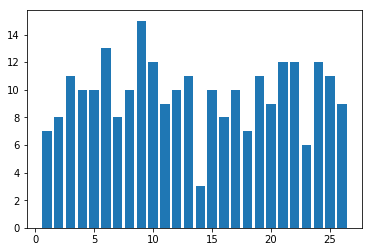

In [67]:
keys = []
values = []
for key, value in frequency_PB.iteritems():
    keys.append(key)
    values.append(value)
plt.bar(keys, values)
plt.show()

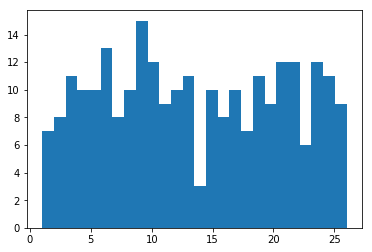

In [72]:
plt.hist(data.PB, bins=26)
plt.show()